## Import Modules

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import nltk
import re
import string
import sklearn
import time

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from tensorflow import keras
from keras import layers
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [9]:
import import_ipynb
import capstone_functions_04
from capstone_functions_04 import save_plot_function, plot_learning_curve, learning_curve_function

### Import TF-IDF_DF

In [12]:
# First import X_tfidf_full_df, clean_df for the indices, and target variable

# tfidf csv
X_tfidf = pd.read_csv('../data/X_tfidf_full_df.csv')

# clean_df csv 
clean_df = pd.read_csv('../data/cleaned_df_eda_01.csv')

# target variable csv
y = pd.read_csv('../data/y_labels.csv')

In [14]:
# confirm files have been imported 

print(f'TF-IDF Dataframe:\n{X_tfidf.head()}')

print(f'Clean Dataframe:\n{clean_df.head()}')

print(f'Target variable:\n{y.head()}')

TF-IDF Dataframe:
    ab   ability      able  abroad  academic  accept  access  accommodation  \
0  0.0  0.000000  0.000000     0.0       0.0     0.0     0.0            0.0   
1  0.0  0.000000  0.014251     0.0       0.0     0.0     0.0            0.0   
2  0.0  0.000000  0.000000     0.0       0.0     0.0     0.0            0.0   
3  0.0  0.023637  0.000000     0.0       0.0     0.0     0.0            0.0   
4  0.0  0.000000  0.033142     0.0       0.0     0.0     0.0            0.0   

   accordance  according  ...  function_Sales  function_Science  \
0    0.000000    0.00000  ...             0.0               0.0   
1    0.000000    0.00000  ...             0.0               0.0   
2    0.082961    0.07862  ...             0.0               0.0   
3    0.000000    0.00000  ...             1.0               0.0   
4    0.000000    0.00000  ...             0.0               0.0   

   function_Strategy/Planning  function_Supply Chain  function_Training  \
0                         0.0

In [16]:
# assign X and y for train test split

X = X_tfidf
y = clean_df['fraudulent']

In [18]:
# only use train_test_split once based off of the index of clean_df
train_indices, test_indices = train_test_split(clean_df.index, test_size=0.2, stratify=y, random_state=42) 

In [20]:
#splitting train and test based off of indices from original dataset
X_tfidf_train = X_tfidf.loc[train_indices]
X_tfidf_test = X_tfidf.loc[test_indices]
y_train = y.loc[train_indices]
y_test = y.loc[test_indices]

In [22]:
X_tfidf_train.shape

(14182, 2289)

In [24]:
X_tfidf_test.shape

(3546, 2289)

In [26]:
y_train.shape

(14182,)

In [28]:
y_test.shape

(3546,)

### Logistic Regression TF-IDF (01)

Logistic regression accuracy: 0.9749012972363226
lg confusion matrix:
[[3361   13]
 [  76   96]]
Logistic regression classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3374
           1       0.88      0.56      0.68       172

    accuracy                           0.97      3546
   macro avg       0.93      0.78      0.84      3546
weighted avg       0.97      0.97      0.97      3546



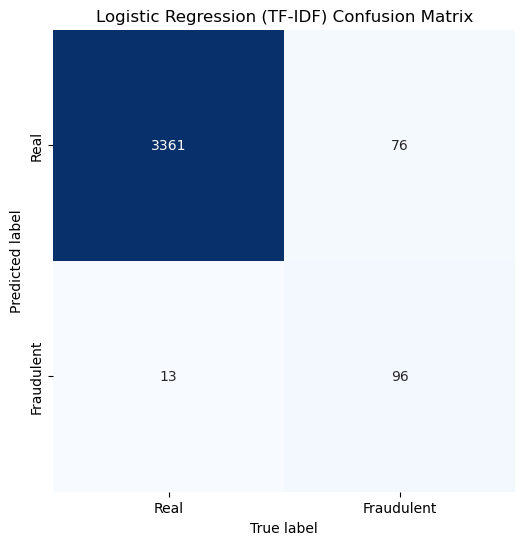

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image030.png
CPU times: total: 5.39 s
Wall time: 5.57 s


In [31]:
%%time

# Build baseline Logistic Regression model
lg_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model
lg_model.fit(X_tfidf_train, y_train)

# Predicted values 
y_pred_01 = lg_model.predict(X_tfidf_test)

# Predicted probabilities 
y_prob_01 = lg_model.predict_proba(X_tfidf_test)[:,1]

# Accuracy score
acc_01 = accuracy_score(y_test, y_pred_01)
print(f'Logistic regression accuracy: {acc_01}')

# Confusion matrix 
cm_01 = metrics.confusion_matrix(y_test, y_pred_01)
print(f'lg confusion matrix:\n{cm_01}')

# Classification report 
lg_class_report01 = classification_report(y_test, y_pred_01)
print(f'Logistic regression classification report:\n{lg_class_report01}')

# Plot confusion matrix
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
confuseLabels = ('Real', 'Fraudulent')

# Confusion Matrix
sns.heatmap(cm_01.T, square= True, annot= True, fmt= 'd',cbar= False, 
            cmap= 'Blues', ax= ax, xticklabels= confuseLabels, yticklabels= confuseLabels)

# Title 
ax.set_title('Logistic Regression (TF-IDF) Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

save_plot_function(30)

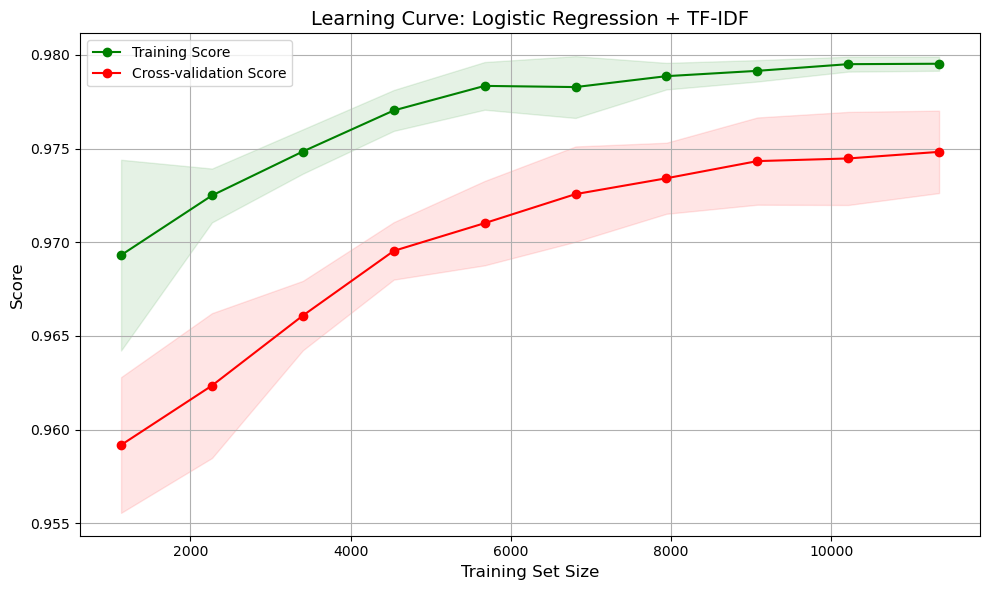

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image086.png
CPU times: total: 2.08 s
Wall time: 56.2 s


In [35]:
%%time
learning_curve_function(lg_model, X_tfidf_train, y_train, 86, name='Logistic Regression + TF-IDF')

### Linear SVC TF-IDF (02)

Cross validation average score: 0.9827249766666567
Accuracy score for svm model: 0.9825155104342922
svm confusion matrix:
[[3354   20]
 [  42  130]]
Linear SVC class report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3374
           1       0.87      0.76      0.81       172

    accuracy                           0.98      3546
   macro avg       0.93      0.87      0.90      3546
weighted avg       0.98      0.98      0.98      3546



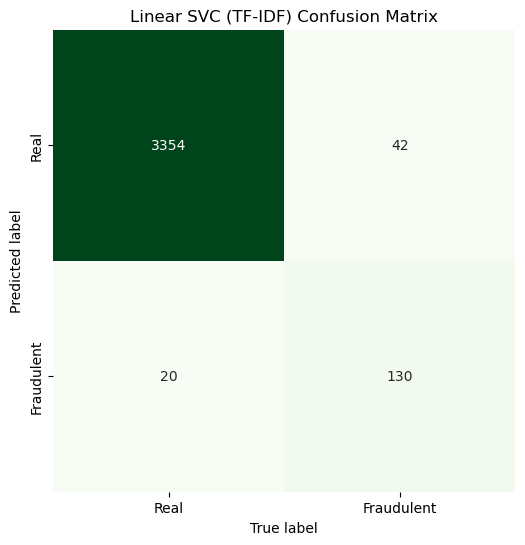

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image031.png
CPU times: total: 13 s
Wall time: 13.3 s


In [38]:
%%time 

# Create LinearSVC model 
svm_model = LinearSVC(max_iter=1000, random_state=42, dual='auto')

# Fit the model 
svm_model.fit(X_tfidf_train, y_train)

# Calculate cross validation score with 10 fold evaluating model performance 
cv_score = cross_val_score(svm_model, X_tfidf_train, y_train, cv=10)
print(f'Cross validation average score: {cv_score.mean()}')

# Predicted values 
y_pred_02 = svm_model.predict(X_tfidf_test)

# Predicted probabilities, using decision_score function as linearSVC does not have predict_proba()
decision_score_02 = svm_model.decision_function(X_tfidf_test)

# Accuracy score
acc_02 = accuracy_score(y_test, y_pred_02)
print(f'Accuracy score for svm model: {acc_02}')

# Confusion matrix 
cm_02 = confusion_matrix(y_test, y_pred_02)
print(f'svm confusion matrix:\n{cm_02}')

# Class report
svm_class_report02 = classification_report(y_test, y_pred_02)
print(f'Linear SVC class report:\n{svm_class_report02}')

# Plot confusion matrix
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
confuseLabels = ('Real', 'Fraudulent')

# Confusion Matrix
sns.heatmap(cm_02.T, square= True, annot= True, fmt= 'd',cbar= False, 
            cmap= 'Greens', ax= ax, xticklabels= confuseLabels, yticklabels= confuseLabels)

# Title 
ax.set_title('Linear SVC (TF-IDF) Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

save_plot_function(31)

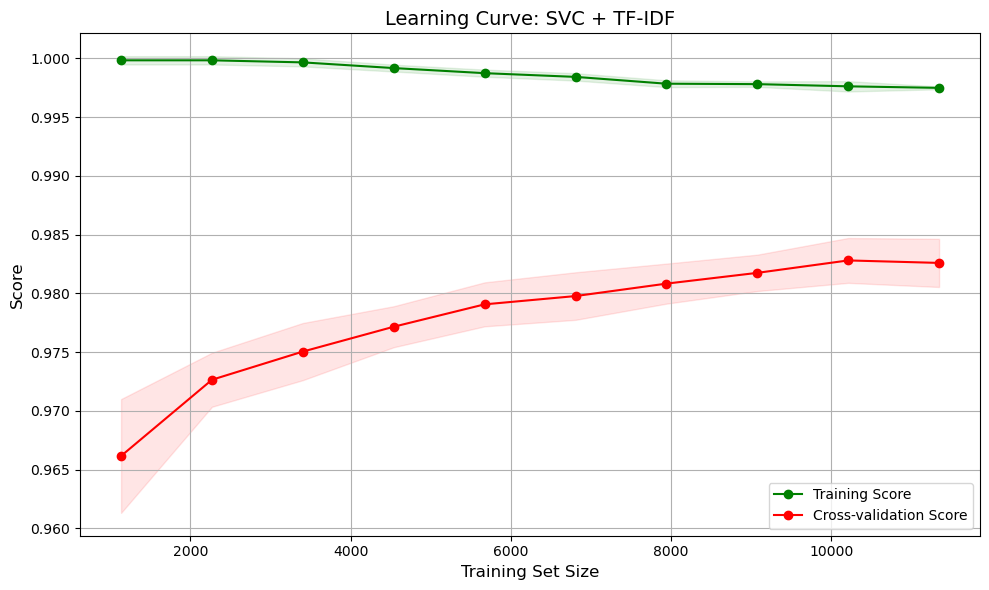

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image087.png
CPU times: total: 1.47 s
Wall time: 14.7 s


In [42]:
%%time
learning_curve_function(svm_model, X_tfidf_train, y_train, 87, name='SVC + TF-IDF')

### Random Forest TF-IDF (03)

Accuracy for random forest: 0.9771573604060914
Random forest confusion matrix:
[[3373    1]
 [  80   92]]
rf classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3374
           1       0.99      0.53      0.69       172

    accuracy                           0.98      3546
   macro avg       0.98      0.77      0.84      3546
weighted avg       0.98      0.98      0.97      3546



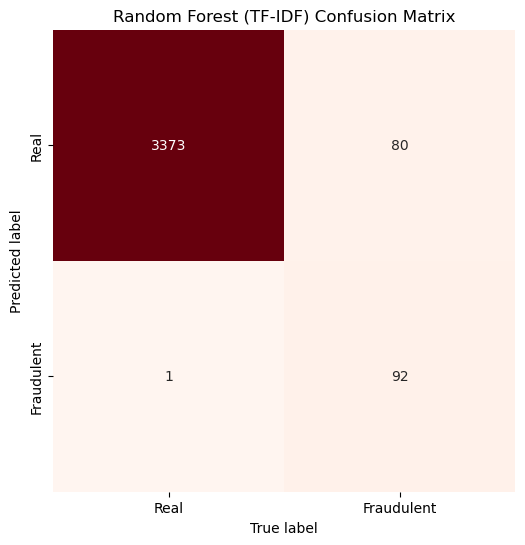

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image032.png
CPU times: total: 16.6 s
Wall time: 17.3 s


In [46]:
%%time 

# Create random forest model 
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)

# Fit the model 
rf_model.fit(X_tfidf_train, y_train)

# Predicted values
y_pred_03 = rf_model.predict(X_tfidf_test)

# Predicted probabilites 
y_prob_03 = rf_model.predict_proba(X_tfidf_test)[:,1]

# Accuracy score 
acc_03 = accuracy_score(y_test, y_pred_03)
print(f'Accuracy for random forest: {acc_03}')

# Confusion matrix 
cm_03 = confusion_matrix(y_test, y_pred_03)
print(f'Random forest confusion matrix:\n{cm_03}')

# Classification report 
rf_class_report03 = classification_report(y_test, y_pred_03)
print(f'rf classification report:\n {rf_class_report03}')

# Plot confusion matrix
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

# Confusion Matrix
sns.heatmap(cm_03.T, square= True, annot= True, fmt= 'd',cbar= False, 
            cmap= 'Reds', ax= ax, xticklabels= confuseLabels, yticklabels= confuseLabels)

# Title 
ax.set_title('Random Forest (TF-IDF) Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

save_plot_function(32)

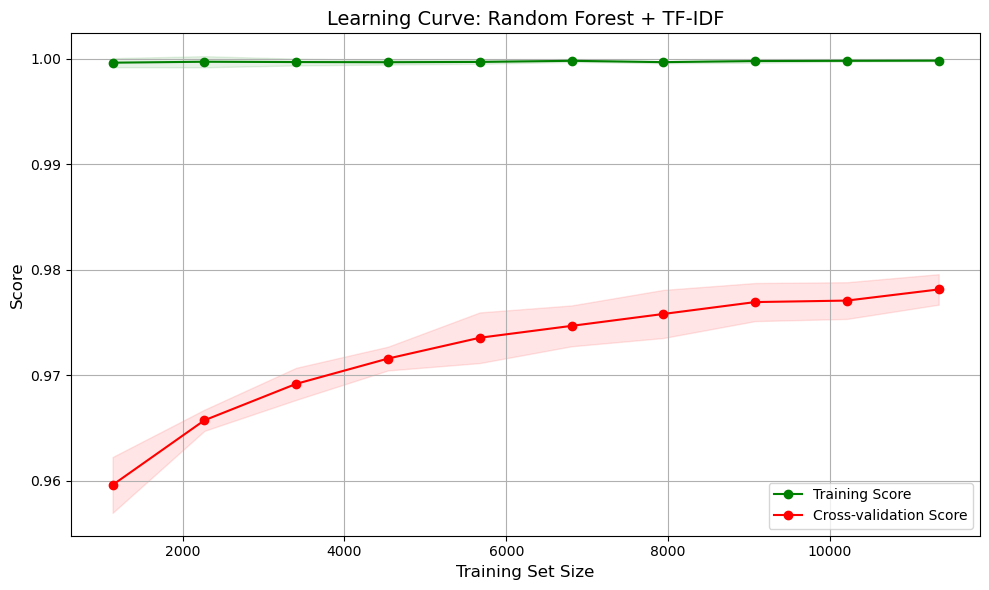

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image088.png
CPU times: total: 1.36 s
Wall time: 1min 28s


In [49]:
%%time
learning_curve_function(rf_model, X_tfidf_train, y_train, 88, name='Random Forest + TF-IDF')

## Import Word2Vec DF

In [51]:
X_word2vec = pd.read_csv('../data/X_word2vec_full_df.csv')

In [52]:
X_word2vec.isna().sum()

0                           0
1                           0
2                           0
3                           0
4                           0
                           ..
function_Unknown            0
function_Writing/Editing    0
telecommuting               0
has_company_logo            0
has_questions               0
Length: 339, dtype: int64

In [53]:
# confirm files have been imported 

print(f'Word2Vec Dataframe:\n{X_word2vec.head()}')

Word2Vec Dataframe:
          0         1         2         3         4         5         6  \
0  0.190273 -0.258885  0.223806  0.006876  0.017956 -0.253347 -0.016420   
1  0.186255 -0.035875  0.209112  0.142941 -0.188873 -0.221377  0.122941   
2 -0.081473 -0.082615  0.541496  0.111783 -0.432765 -0.274162 -0.053919   
3 -0.012396 -0.021880  0.222611 -0.117100 -0.209655 -0.074782  0.108666   
4  0.019057 -0.088404  0.410146  0.042365 -0.359827 -0.075782  0.020675   

          7         8         9  ...  function_Sales  function_Science  \
0  0.628772  0.182202 -0.094518  ...             0.0               0.0   
1  0.598011  0.181162 -0.244013  ...             0.0               0.0   
2  0.731751  0.030914 -0.196935  ...             0.0               0.0   
3  0.778406 -0.111638 -0.221249  ...             1.0               0.0   
4  0.723396  0.033004 -0.236233  ...             0.0               0.0   

   function_Strategy/Planning  function_Supply Chain  function_Training  \
0        

In [54]:
X_word2vec_train = X_word2vec.loc[train_indices]
X_word2vec_test = X_word2vec.loc[test_indices]

In [55]:
X_word2vec_train.shape

(14182, 339)

In [56]:
X_word2vec_test.shape

(3546, 339)

In [57]:
y_train.shape

(14182,)

In [58]:
y_test.shape

(3546,)

### Logistic Regression Word2Vec (04)

Logistic regression accuracy: 0.9644670050761421
lg confusion matrix:
[[3346   28]
 [  98   74]]
Logistic regression classification report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3374
           1       0.73      0.43      0.54       172

    accuracy                           0.96      3546
   macro avg       0.85      0.71      0.76      3546
weighted avg       0.96      0.96      0.96      3546



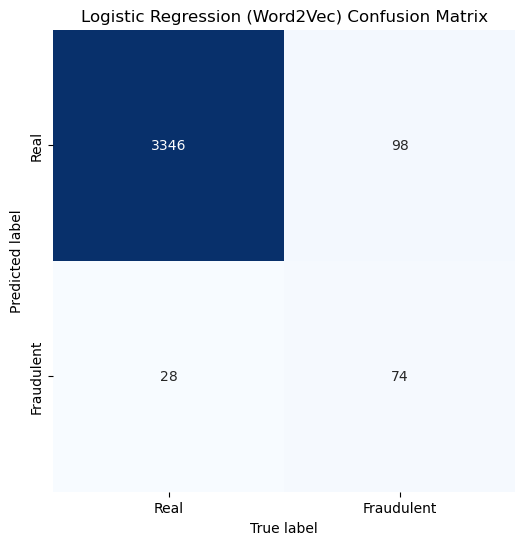

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image033.png
CPU times: total: 859 ms
Wall time: 878 ms


In [70]:
%%time
# Build baseline Logistic Regression model
lg_w2v_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model
lg_w2v_model.fit(X_word2vec_train, y_train)

# Predicted values 
y_pred_04 = lg_w2v_model.predict(X_word2vec_test)

# Predicted probabilities 
y_prob_04 = lg_w2v_model.predict_proba(X_word2vec_test)[:,1]

# Accuracy score
acc_04 = accuracy_score(y_test, y_pred_04)
print(f'Logistic regression accuracy: {acc_04}')

# Confusion matrix 
cm_04 = metrics.confusion_matrix(y_test, y_pred_04)
print(f'lg confusion matrix:\n{cm_04}')

# Classification report 
lg_class_report04 = classification_report(y_test, y_pred_04)
print(f'Logistic regression classification report:\n{lg_class_report04}')

# Plot confusion matrix
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
confuseLabels = ('Real', 'Fraudulent')

# Confusion Matrix
sns.heatmap(cm_04.T, square= True, annot= True, fmt= 'd',cbar= False, 
            cmap= 'Blues', ax= ax, xticklabels= confuseLabels, yticklabels= confuseLabels)

# Title 
ax.set_title('Logistic Regression (Word2Vec) Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

save_plot_function(33)

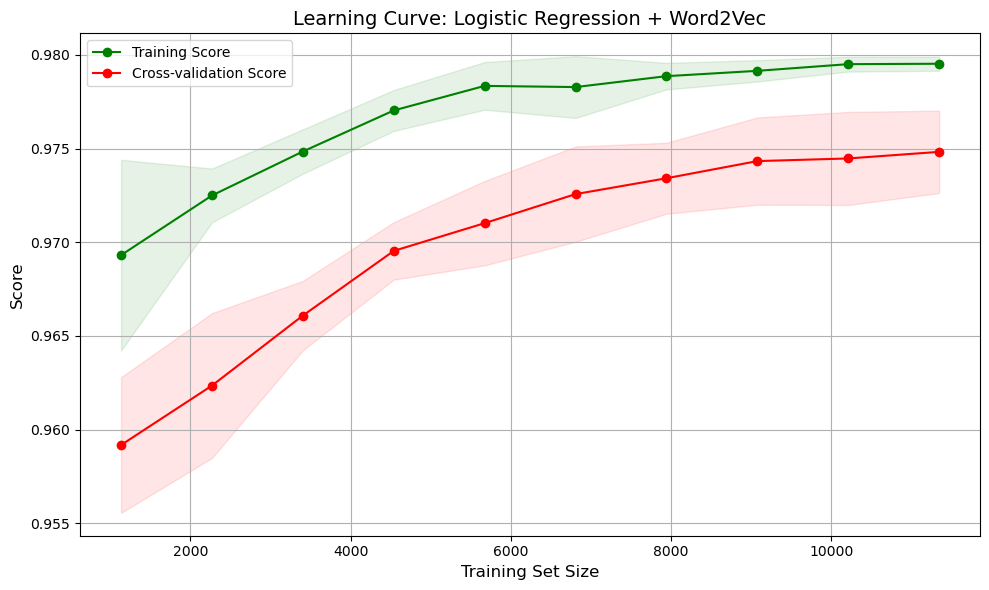

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image089.png
CPU times: total: 1.7 s
Wall time: 40.6 s


In [72]:
%%time
learning_curve_function(lg_w2v_model, X_tfidf_train, y_train, 89, name='Logistic Regression + Word2Vec')

### SVC Word2Vec (05)

Cross validation average score: 0.973417532162243
Accuracy score for svm model: 0.9743372814438804
svm confusion matrix:
[[3366    8]
 [  83   89]]
Linear SVC class report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3374
           1       0.92      0.52      0.66       172

    accuracy                           0.97      3546
   macro avg       0.95      0.76      0.82      3546
weighted avg       0.97      0.97      0.97      3546



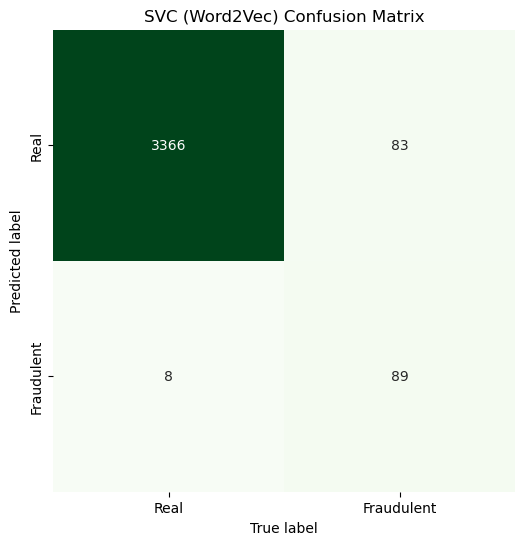

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image034.png
CPU times: total: 58.3 s
Wall time: 1min


In [78]:
%%time 

# Create LinearSVC model 
svm_w2v_model = SVC(max_iter=5000, random_state=42)

# Fit the model 
svm_w2v_model.fit(X_word2vec_train, y_train)

# Calculate cross validation score with 10 fold evaluating model performance 
cv_score_05 = cross_val_score(svm_w2v_model, X_word2vec_train, y_train, cv=10)
print(f'Cross validation average score: {cv_score_05.mean()}')

# Predicted values 
y_pred_05 = svm_w2v_model.predict(X_word2vec_test)

# Predicted probabilities, using decision_score function as linearSVC does not have predict_proba()
decision_score_05 = svm_model.decision_function(X_tfidf_test)

# Accuracy score
acc_05 = accuracy_score(y_test, y_pred_05)
print(f'Accuracy score for svm model: {acc_05}')

# Confusion matrix 
cm_05 = confusion_matrix(y_test, y_pred_05)
print(f'svm confusion matrix:\n{cm_05}')

# Class report
svm_class_report05 = classification_report(y_test, y_pred_05)
print(f'Linear SVC class report:\n{svm_class_report05}')

# Plot confusion matrix
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
confuseLabels = ('Real', 'Fraudulent')

# Confusion Matrix
sns.heatmap(cm_05.T, square= True, annot= True, fmt= 'd',cbar= False, 
            cmap= 'Greens', ax= ax, xticklabels= confuseLabels, yticklabels= confuseLabels)

# Title 
ax.set_title('SVC (Word2Vec) Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

save_plot_function(34)

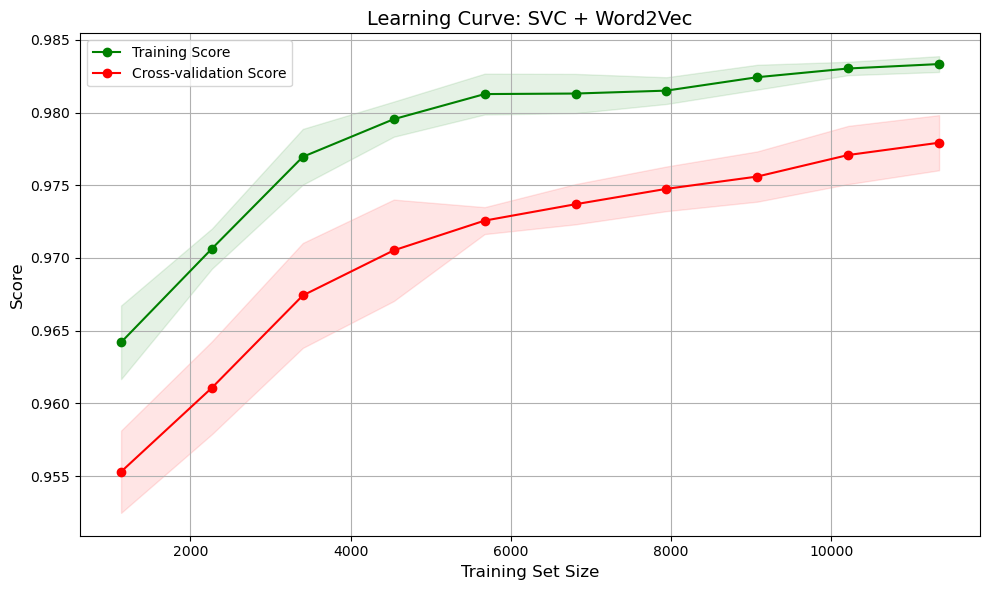

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image090.png
CPU times: total: 7.78 s
Wall time: 14min 22s


In [82]:
%%time
learning_curve_function(svm_w2v_model, X_tfidf_train, y_train, 90, name='SVC + Word2Vec')

### Random Forest Word2Vec (06)

Accuracy for random forest: 0.9740552735476593
Random forest confusion matrix:
[[3374    0]
 [  92   80]]
rf classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3374
           1       1.00      0.47      0.63       172

    accuracy                           0.97      3546
   macro avg       0.99      0.73      0.81      3546
weighted avg       0.97      0.97      0.97      3546



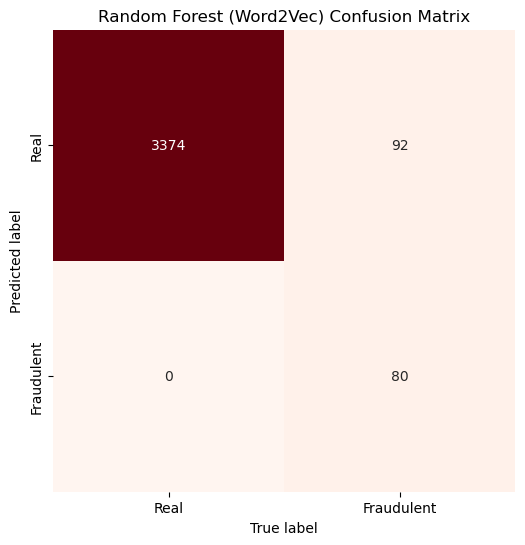

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image035.png
CPU times: total: 4.12 s
Wall time: 4.19 s


In [83]:
%%time 

# Create random forest model 
rf_w2v_model = RandomForestClassifier(n_estimators=50, random_state=42)

# Fit the model 
rf_w2v_model.fit(X_word2vec_train, y_train)

# Predicted values
y_pred_06 = rf_w2v_model.predict(X_word2vec_test)

# Predicted probabilites 
y_prob_06 = rf_w2v_model.predict_proba(X_word2vec_test)[:,1]

# Accuracy score 
acc_06 = accuracy_score(y_test, y_pred_06)
print(f'Accuracy for random forest: {acc_06}')

# Confusion matrix 
cm_06 = confusion_matrix(y_test, y_pred_06)
print(f'Random forest confusion matrix:\n{cm_06}')

# Classification report 
rf_class_report06 = classification_report(y_test, y_pred_06)
print(f'rf classification report:\n {rf_class_report06}')

# Plot confusion matrix
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

# Confusion Matrix
sns.heatmap(cm_06.T, square= True, annot= True, fmt= 'd',cbar= False, 
            cmap= 'Reds', ax= ax, xticklabels= confuseLabels, yticklabels= confuseLabels)

# Title 
ax.set_title('Random Forest (Word2Vec) Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

save_plot_function(35)

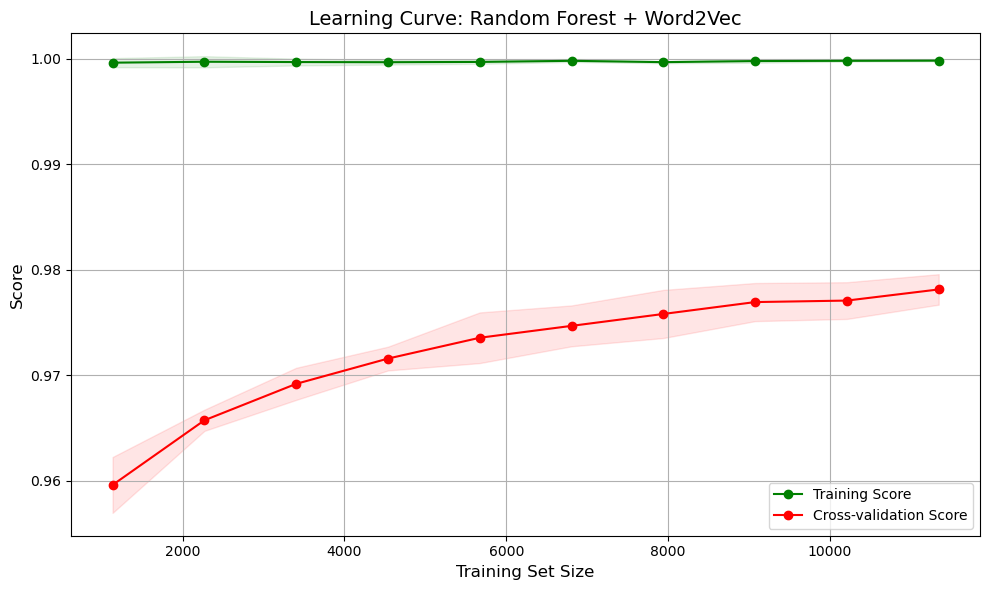

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image091.png
CPU times: total: 1.72 s
Wall time: 1min 30s


In [84]:
%%time
learning_curve_function(rf_w2v_model, X_tfidf_train, y_train, 91, name='Random Forest + Word2Vec')

## Import CountVec DF

In [86]:
X_count_vec = pd.read_csv('../data/X_cv_full_df.csv')

In [87]:
# confirm files have been imported 

print(f'Word2Vec Dataframe:\n{X_count_vec.head()}')

Word2Vec Dataframe:
   ab  ability  able  abroad  academic  accept  access  accommodation  \
0   0        0     0       0         0       0       0              0   
1   0        0     1       0         0       0       0              0   
2   0        0     0       0         0       0       0              0   
3   0        1     0       0         0       0       0              0   
4   0        0     1       0         0       0       0              0   

   accordance  according  ...  function_Sales  function_Science  \
0           0          0  ...             0.0               0.0   
1           0          0  ...             0.0               0.0   
2           1          1  ...             0.0               0.0   
3           0          0  ...             1.0               0.0   
4           0          0  ...             0.0               0.0   

   function_Strategy/Planning  function_Supply Chain  function_Training  \
0                         0.0                    0.0           

In [88]:
X_cv_train = X_count_vec.loc[train_indices]
X_cv_test = X_count_vec.loc[test_indices]

In [89]:
X_cv_train.shape

(14182, 2289)

In [90]:
X_cv_test.shape

(3546, 2289)

In [91]:
y_train.shape

(14182,)

In [92]:
y_test.shape

(3546,)

### Logistic Regression CountVect (07)

Logistic regression accuracy: 0.9808234630569655
lg confusion matrix:
[[3347   27]
 [  41  131]]
Logistic regression classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3374
           1       0.83      0.76      0.79       172

    accuracy                           0.98      3546
   macro avg       0.91      0.88      0.89      3546
weighted avg       0.98      0.98      0.98      3546



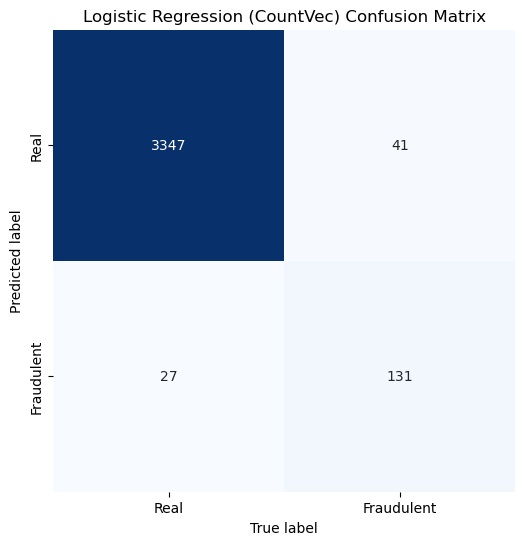

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image036.png
CPU times: total: 5.44 s
Wall time: 5.49 s


In [94]:
%%time
# Build baseline Logistic Regression model
lg_cv_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model
lg_cv_model.fit(X_cv_train, y_train)

# Predicted values 
y_pred_07 = lg_cv_model.predict(X_cv_test)

# Predicted probabilities 
y_prob_07 = lg_cv_model.predict_proba(X_cv_test)[:,1]

# Accuracy score
acc_07 = accuracy_score(y_test, y_pred_07)
print(f'Logistic regression accuracy: {acc_07}')

# Confusion matrix 
cm_07 = metrics.confusion_matrix(y_test, y_pred_07)
print(f'lg confusion matrix:\n{cm_07}')

# Classification report 
lg_class_report07 = classification_report(y_test, y_pred_07)
print(f'Logistic regression classification report:\n{lg_class_report07}')

# Plot confusion matrix
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
confuseLabels = ('Real', 'Fraudulent')

# Confusion Matrix
sns.heatmap(cm_07.T, square= True, annot= True, fmt= 'd',cbar= False, 
            cmap= 'Blues', ax= ax, xticklabels= confuseLabels, yticklabels= confuseLabels)

# Title 
ax.set_title('Logistic Regression (CountVec) Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

save_plot_function(36)

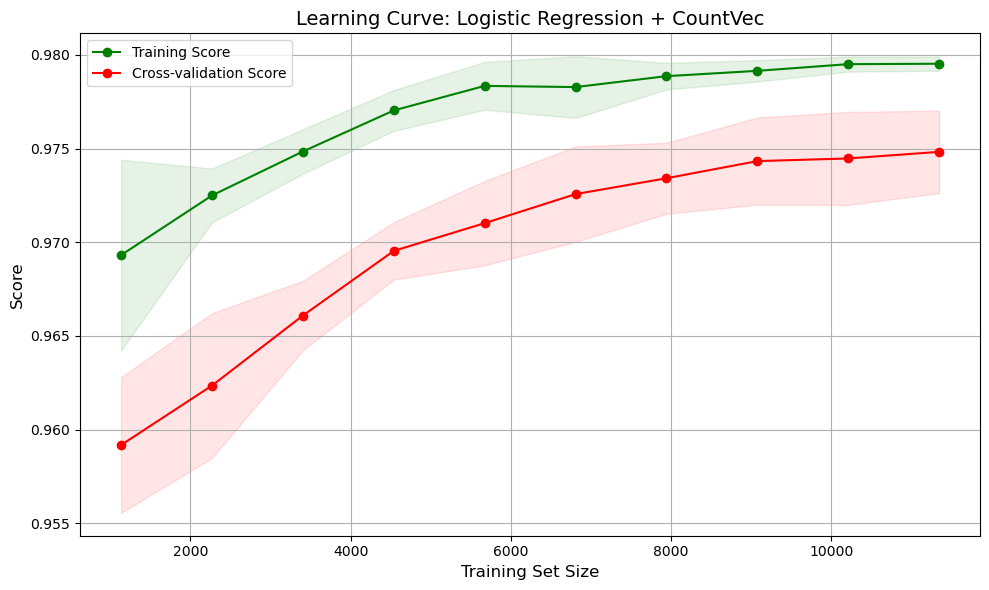

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image092.png
CPU times: total: 1.41 s
Wall time: 39.4 s


In [95]:
%%time
learning_curve_function(lg_cv_model, X_tfidf_train, y_train, 92, name='Logistic Regression + CountVec')

### Linear SVC CountVect (08)

Cross validation average score: 0.973417532162243
Accuracy score for svm model: 0.9746192893401016
svm confusion matrix:
[[3372    2]
 [  88   84]]
Linear SVC class report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3374
           1       0.98      0.49      0.65       172

    accuracy                           0.97      3546
   macro avg       0.98      0.74      0.82      3546
weighted avg       0.97      0.97      0.97      3546



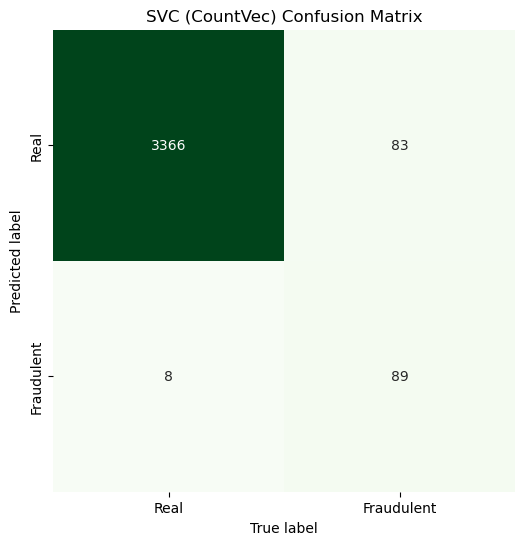

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image037.png
CPU times: total: 11min 34s
Wall time: 11min 52s


In [97]:
%%time 

# Create LinearSVC model 
svm_cv_model = SVC(max_iter=5000, random_state=42)

# Fit the model 
svm_cv_model.fit(X_cv_train, y_train)

# Calculate cross validation score with 10 fold evaluating model performance 
cv_score_08 = cross_val_score(svm_cv_model, X_cv_train, y_train, cv=10)
print(f'Cross validation average score: {cv_score_05.mean()}')

# Predicted values 
y_pred_08 = svm_cv_model.predict(X_cv_test)

# Predicted probabilities, using decision_score function as linearSVC does not have predict_proba()
decision_score_08 = svm_cv_model.decision_function(X_cv_test)

# Accuracy score
acc_08 = accuracy_score(y_test, y_pred_08)
print(f'Accuracy score for svm model: {acc_08}')

# Confusion matrix 
cm_08 = confusion_matrix(y_test, y_pred_08)
print(f'svm confusion matrix:\n{cm_08}')

# Class report
svm_class_report08 = classification_report(y_test, y_pred_08)
print(f'Linear SVC class report:\n{svm_class_report08}')

# Plot confusion matrix
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
confuseLabels = ('Real', 'Fraudulent')

# Confusion Matrix
sns.heatmap(cm_05.T, square= True, annot= True, fmt= 'd',cbar= False, 
            cmap= 'Greens', ax= ax, xticklabels= confuseLabels, yticklabels= confuseLabels)

# Title 
ax.set_title('SVC (CountVec) Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

save_plot_function(37)

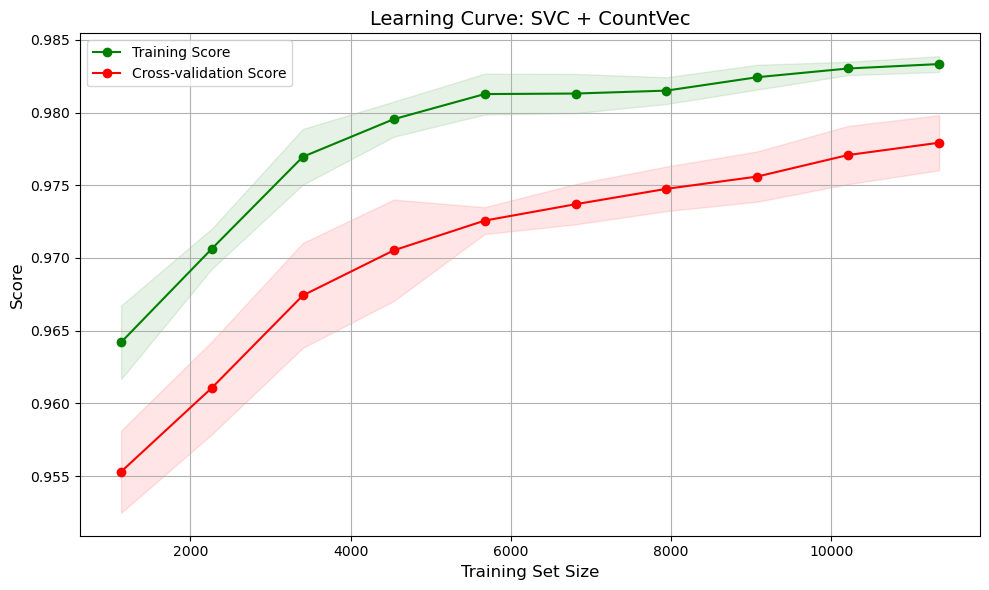

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image093.png
CPU times: total: 8.34 s
Wall time: 14min 18s


In [98]:
%%time
learning_curve_function(svm_cv_model, X_tfidf_train, y_train, 93, name='SVC + CountVec')

### Random Forest CountVect (09)

Accuracy for random forest: 0.9543147208121827
Random forest confusion matrix:
[[3374    0]
 [ 162   10]]
rf classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      3374
           1       1.00      0.06      0.11       172

    accuracy                           0.95      3546
   macro avg       0.98      0.53      0.54      3546
weighted avg       0.96      0.95      0.93      3546



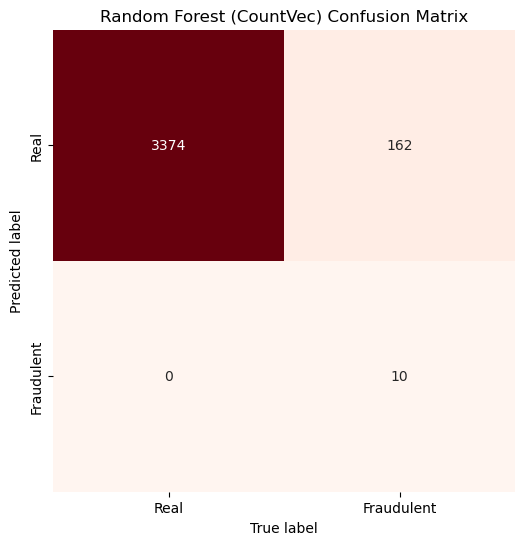

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image038.png
CPU times: total: 1.95 s
Wall time: 2.19 s


In [100]:
%%time 

# Create random forest model 
rf_cv_model = RandomForestClassifier(n_estimators=50,  max_depth=5, random_state=42)

# Fit the model 
rf_cv_model.fit(X_cv_train, y_train)

# Predicted values
y_pred_09 = rf_cv_model.predict(X_cv_test)

# Predicted probabilites 
y_prob_09 = rf_cv_model.predict_proba(X_cv_test)[:,1]

# Accuracy score 
acc_09 = accuracy_score(y_test, y_pred_09)
print(f'Accuracy for random forest: {acc_09}')

# Confusion matrix 
cm_09 = confusion_matrix(y_test, y_pred_09)
print(f'Random forest confusion matrix:\n{cm_09}')

# Classification report 
rf_class_report09 = classification_report(y_test, y_pred_09)
print(f'rf classification report:\n {rf_class_report09}')

# Plot confusion matrix
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

# Confusion Matrix
sns.heatmap(cm_09.T, square= True, annot= True, fmt= 'd',cbar= False, 
            cmap= 'Reds', ax= ax, xticklabels= confuseLabels, yticklabels= confuseLabels)

# Title 
ax.set_title('Random Forest (CountVec) Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

save_plot_function(38)

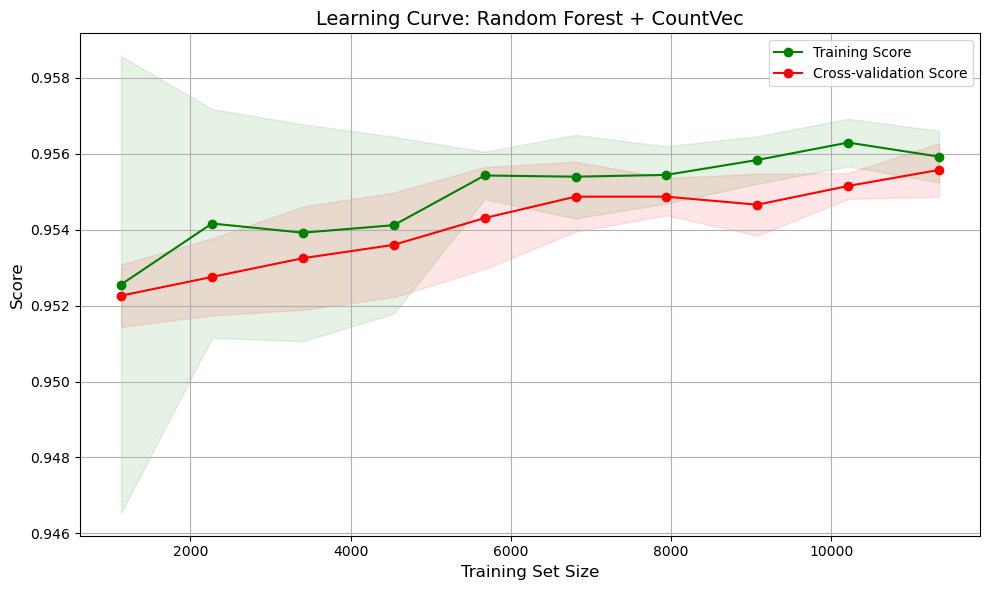

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image094.png
CPU times: total: 1.38 s
Wall time: 20.7 s


In [101]:
%%time
learning_curve_function(rf_cv_model, X_tfidf_train, y_train, 94, name='Random Forest + CountVec')

### Plot ROC curve

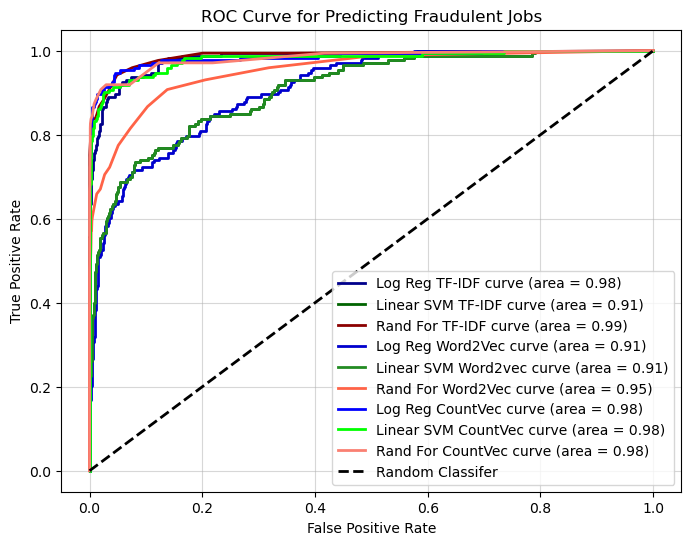

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image039.png


In [175]:
# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr01, tpr01, _ = metrics.roc_curve(y_test, y_prob_01)
fpr02, tpr02, _ = metrics.roc_curve(y_test, decision_score_02)
fpr03, tpr03, _ = metrics.roc_curve(y_test, y_prob_03)
fpr04, tpr04, _ = metrics.roc_curve(y_test, y_prob_04)
fpr05, tpr05, _ = metrics.roc_curve(y_test, decision_score_05)
fpr06, tpr06, _ = metrics.roc_curve(y_test, y_prob_06)
fpr07, tpr07, _ = metrics.roc_curve(y_test, y_prob_07)
fpr08, tpr08, _ = metrics.roc_curve(y_test, decision_score_08)
fpr09, tpr09, _ = metrics.roc_curve(y_test, y_prob_09)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc01 = metrics.auc(fpr01, tpr01)
roc_auc02 = metrics.auc(fpr02, tpr02)
roc_auc03 = metrics.auc(fpr03, tpr03)
roc_auc04 = metrics.auc(fpr04, tpr04)
roc_auc05 = metrics.auc(fpr05, tpr05)
roc_auc06 = metrics.auc(fpr06, tpr06)
roc_auc07 = metrics.auc(fpr07, tpr07)
roc_auc08 = metrics.auc(fpr08, tpr08)
roc_auc09 = metrics.auc(fpr09, tpr09)

# Plot the ROC Curve
plt.figure(figsize =(12, 8))
lw = 1
plt.plot(fpr01, tpr01, color='darkblue', lw = lw, label = 'Log Reg TF-IDF curve (area = %0.2f)' % roc_auc01)
plt.plot(fpr02, tpr02, color='darkgreen', lw = lw, label = 'Linear SVM TF-IDF curve (area = %0.2f)' % roc_auc02)
plt.plot(fpr03, tpr03, color='darkred', lw = lw, label = 'Rand For TF-IDF curve (area = %0.2f)' % roc_auc03)
plt.plot(fpr04, tpr04, color='mediumblue', lw = lw, label = 'Log Reg Word2Vec curve (area = %0.2f)' % roc_auc04)
plt.plot(fpr05, tpr05, color='forestgreen', lw = lw, label = 'Linear SVM Word2vec curve (area = %0.2f)' % roc_auc05)
plt.plot(fpr06, tpr06, color='tomato', lw = lw, label = 'Rand For Word2Vec curve (area = %0.2f)' % roc_auc06)
plt.plot(fpr07, tpr07, color='blue', lw = lw, label = 'Log Reg CountVec curve (area = %0.2f)' % roc_auc07)
plt.plot(fpr08, tpr08, color='lime', lw = lw, label = 'Linear SVM CountVec curve (area = %0.2f)' % roc_auc08)
plt.plot(fpr09, tpr09, color='salmon', lw = lw, label = 'Rand For CountVec curve (area = %0.2f)' % roc_auc09)
plt.plot([0, 1], [0, 1], color = 'black', lw = lw, linestyle = '--', label= 'Random Classifer')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.grid(alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Predicting Fraudulent Jobs')
plt.legend(loc = "lower right")

save_plot_function(39)